# Flight Price Prediction Project

## Overview

The Flight Price Prediction project aims to predict the prices of flights based on various factors such as departure and arrival locations, total stops, flight duration, airline, and more. This can help travelers make informed decisions and allow airlines to optimize their pricing strategies.

## Data Dictionary

| Column Name        | Description                                                |
|--------------------|------------------------------------------------------------|
| **Airline**        | Name of the airline                                        |
| **Source**         | Code of the origin airport                                 |
| **Destination**    | Code of the destination airport                            |
| **Total_Stops**    | Number of stops during the flight                          |
| **Price**          | Price of the flight                                        |
| **Date**           | Day of the flight                                          |
| **Month**          | Month of the flight                                        |
| **Year**           | Year of the flight                                         |
| **Dep_hours**      | Scheduled departure hour                                   |
| **Dep_min**        | Scheduled departure minute                                 |
| **Arrival_hours**  | Scheduled arrival hour                                     |
| **Arrival_min**    | Scheduled arrival minute                                   |
| **Duration_hours** | Duration of the flight in hours                            |
| **Duration_min**   | Duration of the flight in minutes                          |

## Project Goals

- **Predict Flight Prices**: Develop a model to predict the price of a flight based on input features.
- **Feature Analysis**: Understand the importance of different features in determining flight prices.
- **Optimization**: Provide insights that can help optimize pricing strategies for airlines.

## Tools and Technologies

- **Programming Languages**: Python
- **Libraries**: Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn
- **Framework**: Flask (for deploying the model)
- **Database**: MySQL (for storing and retrieving flight data)
- **Deployment**: NGINX (for serving the Flask application)

## Steps Involved

1. **Data Collection**: Gather data on flights, including prices and other relevant features.
2. **Data Preprocessing**: Clean and preprocess the data to make it suitable for modeling.
3. **Exploratory Data Analysis (EDA)**: Analyze the data to uncover patterns and insights.
4. **Feature Engineering**: Create new features that could help improve the model's performance.
5. **Model Building**: Develop machine learning models to predict flight prices.
6. **Model Evaluation**: Evaluate the performance of the models using appropriate metrics.
7. **Deployment**: Deploy the best-performing model using Flask and NGINX.

## Usage

This project can be used for:

- **Travelers**: Helping travelers find the best times to book flights at lower prices.
- **Airlines**: Assisting airlines in optimizing their pricing strategies.
- **Data Scientists**: Providing a case study for building and deploying machine learning models.


**Note**: This project is for educational purposes and demonstrates the application of machine learning in predicting flight prices.


## load the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from feature_engine.discretisation import EqualWidthDiscretiser
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset/flight_dataset.csv')

In [3]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [4]:
df.shape

(10683, 14)

In [5]:
df1 = df.copy()

In [6]:
df1.isnull().sum()

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Date              0
Month             0
Year              0
Dep_hours         0
Dep_min           0
Arrival_hours     0
Arrival_min       0
Duration_hours    0
Duration_min      0
dtype: int64

In [7]:
df1.duplicated().sum()

np.int64(222)

In [8]:
df1 = df1.drop_duplicates()

In [9]:
df1.duplicated().sum()

np.int64(0)

In [10]:
df1.shape

(10461, 14)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10461 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10461 non-null  object
 1   Source          10461 non-null  object
 2   Destination     10461 non-null  object
 3   Total_Stops     10461 non-null  int64 
 4   Price           10461 non-null  int64 
 5   Date            10461 non-null  int64 
 6   Month           10461 non-null  int64 
 7   Year            10461 non-null  int64 
 8   Dep_hours       10461 non-null  int64 
 9   Dep_min         10461 non-null  int64 
 10  Arrival_hours   10461 non-null  int64 
 11  Arrival_min     10461 non-null  int64 
 12  Duration_hours  10461 non-null  int64 
 13  Duration_min    10461 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.2+ MB


In [12]:
df1.describe(include='all')

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
count,10461,10461,10461,10461.000000,10461.000000,10461.000000,10461.000000,10461.0,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000
unique,12,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Jet Airways,Delhi,Cochin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3700,4346,4346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.802505,9027.212504,13.462480,4.701845,2019.0,12.476341,24.408278,13.389638,24.723258,10.029443,28.206672
std,NaN,NaN,NaN,0.660550,4624.861032,8.466967,1.163624,0.0,5.726072,18.817167,6.853854,16.569495,8.378218,16.878282
min,NaN,NaN,NaN,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,5224.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,NaN,NaN,NaN,1.000000,8266.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,NaN,NaN,NaN,1.000000,12346.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000


In [13]:
df1.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Date',
       'Month', 'Year', 'Dep_hours', 'Dep_min', 'Arrival_hours', 'Arrival_min',
       'Duration_hours', 'Duration_min'],
      dtype='object')

In [14]:
df1.head(1)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50


# EDA on Raw Data

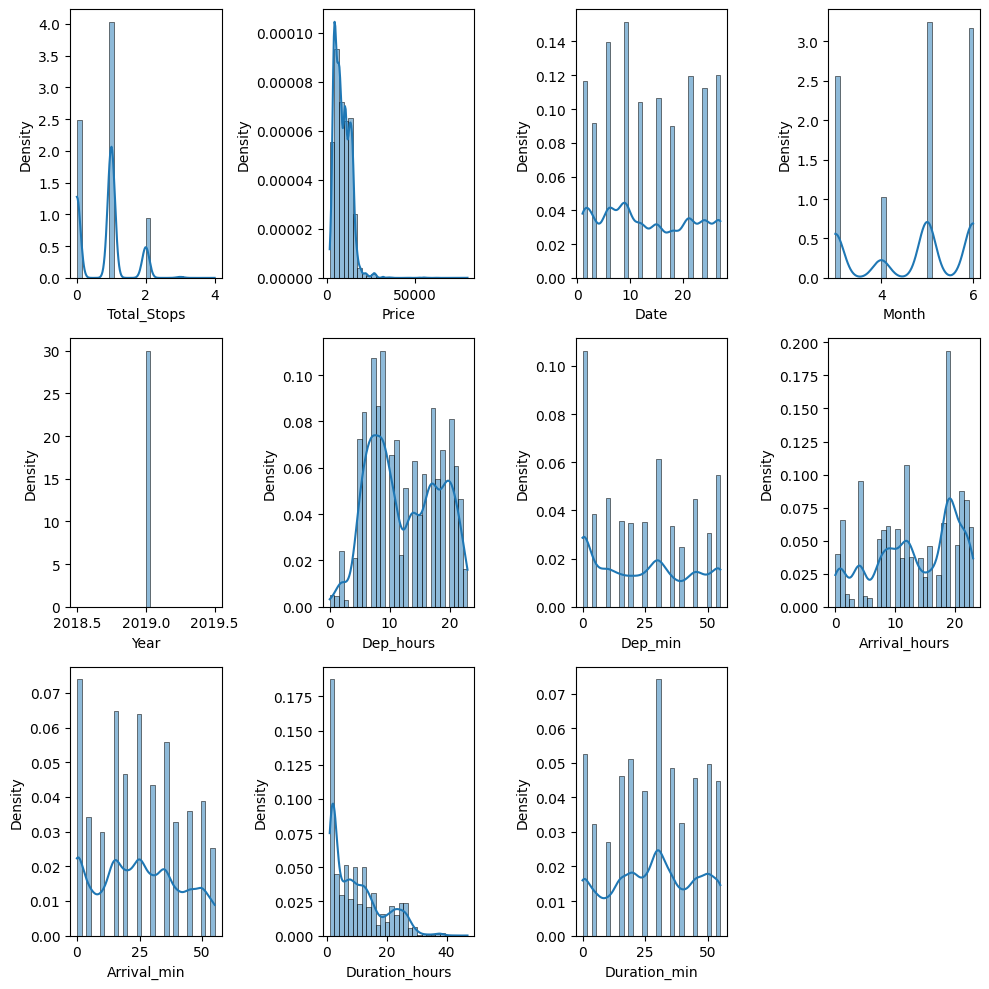

In [15]:
df1_num = [n for n in df1.columns if df1[n].dtype !='O']

fig , ax = plt.subplots(3,4, figsize=(10,10))
ax = ax.flatten()

for i,col in enumerate(df1_num):
    sns.histplot(data = df1[col],kde=True, stat='density', bins=30, ax=ax[i])

for i in range(len(df1_num),12):
    ax[i].axis('off')
plt.tight_layout()

plt.show()


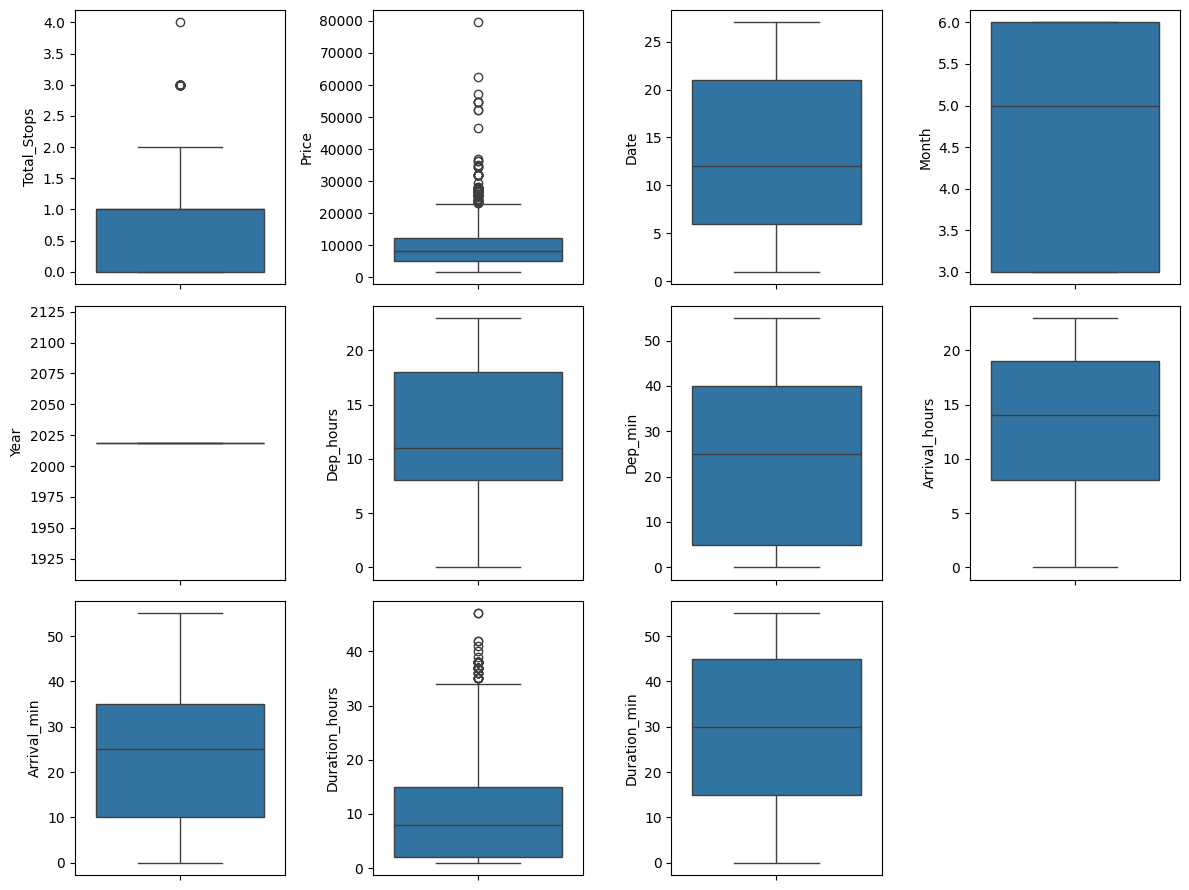

In [16]:
fig , ax = plt.subplots(3,4, figsize=(12,9))
ax = ax.flatten()

for i,col in enumerate(df1_num):
    sns.boxplot(data = df1[col], ax=ax[i])
    
for i in range(len(df1_num),12):
    ax[i].axis('off')

plt.tight_layout()

plt.show()


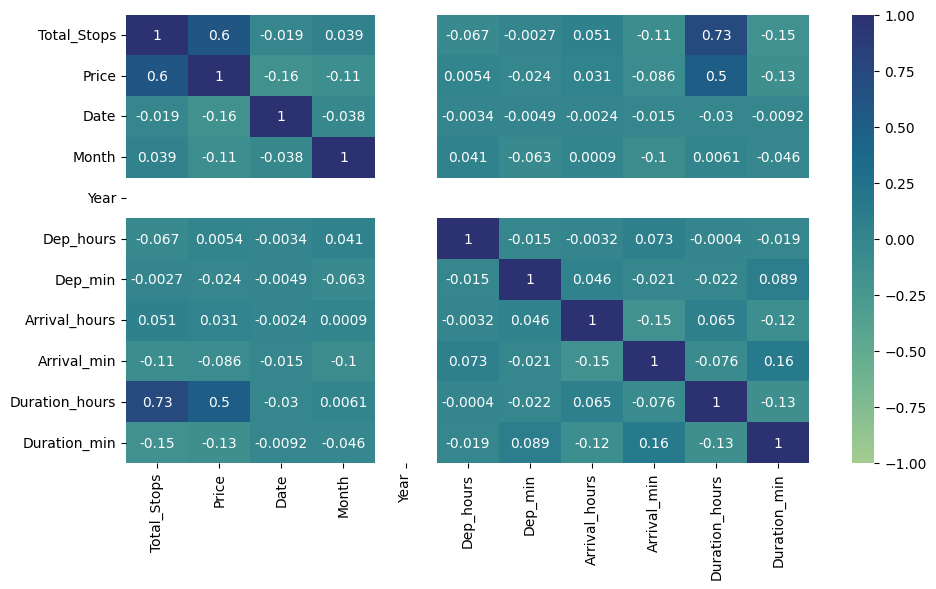

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df1[df1_num].corr(), annot=True,cmap="crest", fmt=".2g", vmin=-1, vmax=1)
plt.tight_layout()

plt.show()

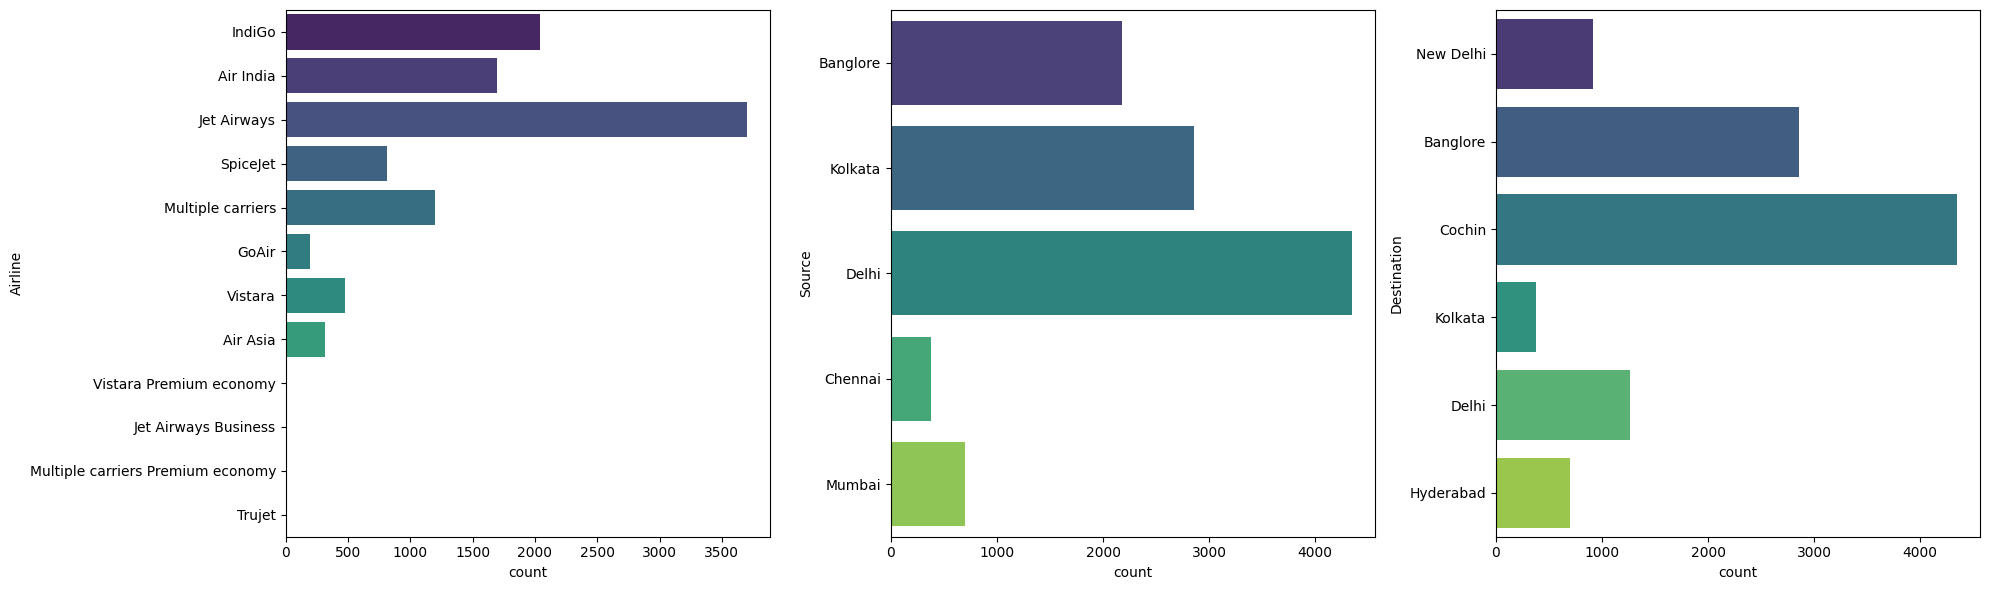

In [18]:
df1_cat = [n for n in df1.columns if df1[n].dtype =='O']

fig , ax = plt.subplots(1,3, figsize=(20,6))
ax = ax.flatten()

for i,col in enumerate(df1_cat):
    sns.countplot(data = df1[col], ax=ax[i], palette='viridis')
plt.tight_layout()
plt.show()


## Data preprocessing

In [19]:
df1 = df1.drop(['Year'], axis=1)

In [20]:
df1.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [21]:
df1.head(1)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50


In [22]:
df1['Dep_time'] = df1['Dep_hours'] + (df1['Dep_min']/60.0)
df1['Arrival_time'] = df1['Arrival_hours'] + (df1['Arrival_min']/60.0)
df1['Duration_time'] = df1['Duration_hours'] + (df1['Duration_min']/60.0)

In [23]:
df1.head(1)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Dep_time,Arrival_time,Duration_time
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,22.333333,1.166667,2.833333


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10461 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Airline         10461 non-null  object 
 1   Source          10461 non-null  object 
 2   Destination     10461 non-null  object 
 3   Total_Stops     10461 non-null  int64  
 4   Price           10461 non-null  int64  
 5   Date            10461 non-null  int64  
 6   Month           10461 non-null  int64  
 7   Dep_hours       10461 non-null  int64  
 8   Dep_min         10461 non-null  int64  
 9   Arrival_hours   10461 non-null  int64  
 10  Arrival_min     10461 non-null  int64  
 11  Duration_hours  10461 non-null  int64  
 12  Duration_min    10461 non-null  int64  
 13  Dep_time        10461 non-null  float64
 14  Arrival_time    10461 non-null  float64
 15  Duration_time   10461 non-null  float64
dtypes: float64(3), int64(10), object(3)
memory usage: 1.4+ MB


In [25]:
df1.isnull().sum()

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Date              0
Month             0
Dep_hours         0
Dep_min           0
Arrival_hours     0
Arrival_min       0
Duration_hours    0
Duration_min      0
Dep_time          0
Arrival_time      0
Duration_time     0
dtype: int64

In [26]:
def cate_hour(hour):
    hour=int(hour)
    if hour >= 5 and hour < 12:
        return 'Morning'
    elif hour >= 12 and hour < 17:
        return 'Afternoon'
    elif hour >= 17 and hour < 21:
        return 'Evening'
    else:
        return 'Night'
df1['Dep_time'] = df1['Dep_time'].apply(cate_hour)
df1['Arrival_time'] = df1['Arrival_time'].apply(cate_hour)


In [27]:
df1 = df1.drop(['Dep_hours','Dep_min','Arrival_hours','Arrival_min','Duration_hours','Duration_min'], axis=1)

In [28]:
df1.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_time,Arrival_time,Duration_time
0,IndiGo,Banglore,New Delhi,0,3897,24,3,Night,Night,2.833333
1,Air India,Kolkata,Banglore,2,7662,1,5,Morning,Afternoon,7.416667
2,Jet Airways,Delhi,Cochin,2,13882,9,6,Morning,Night,19.000000
3,IndiGo,Kolkata,Banglore,1,6218,12,5,Evening,Night,5.416667
4,IndiGo,Banglore,New Delhi,1,13302,1,3,Afternoon,Night,4.750000


In [29]:
df1['Duration_time'] = df1['Duration_time']

In [30]:
df1.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_time,Arrival_time,Duration_time
0,IndiGo,Banglore,New Delhi,0,3897,24,3,Night,Night,2.833333
1,Air India,Kolkata,Banglore,2,7662,1,5,Morning,Afternoon,7.416667
2,Jet Airways,Delhi,Cochin,2,13882,9,6,Morning,Night,19.000000
3,IndiGo,Kolkata,Banglore,1,6218,12,5,Evening,Night,5.416667
4,IndiGo,Banglore,New Delhi,1,13302,1,3,Afternoon,Night,4.750000


## EDA

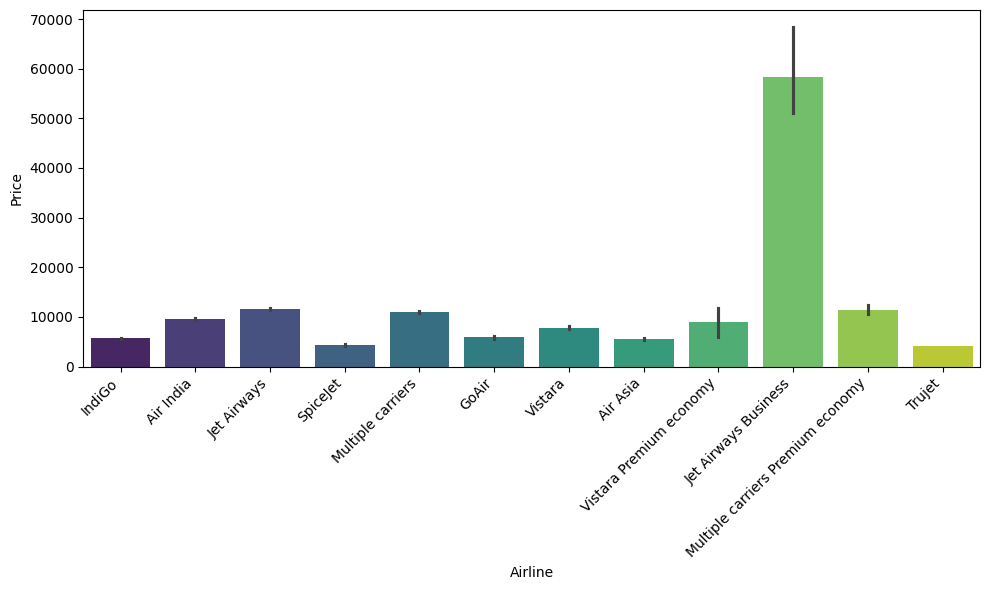

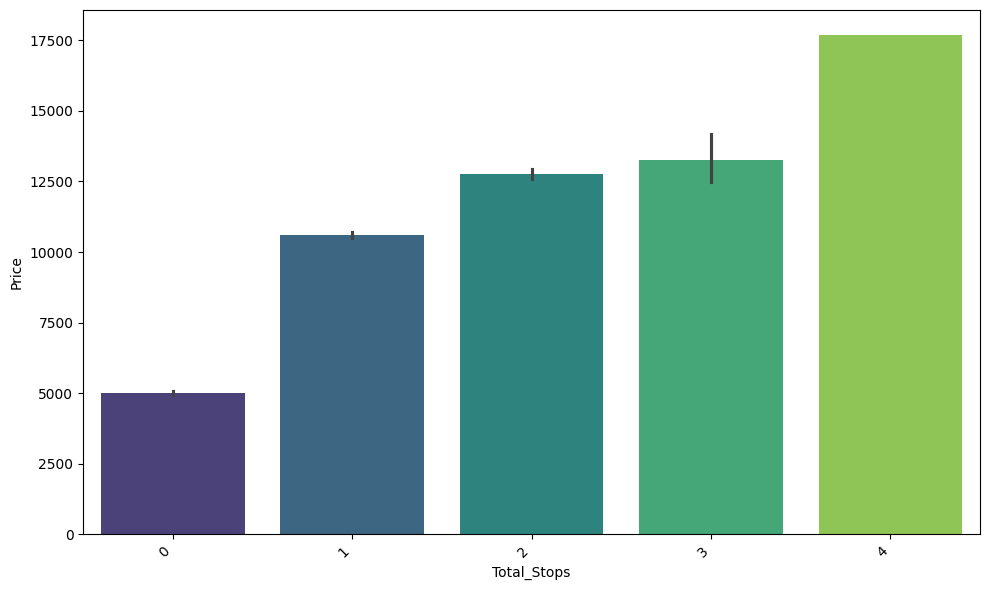

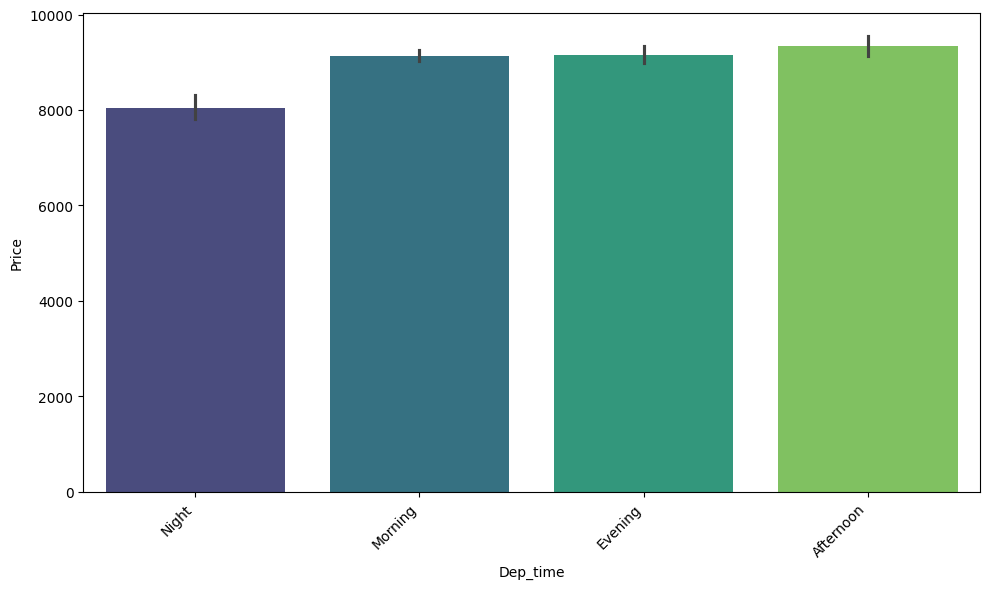

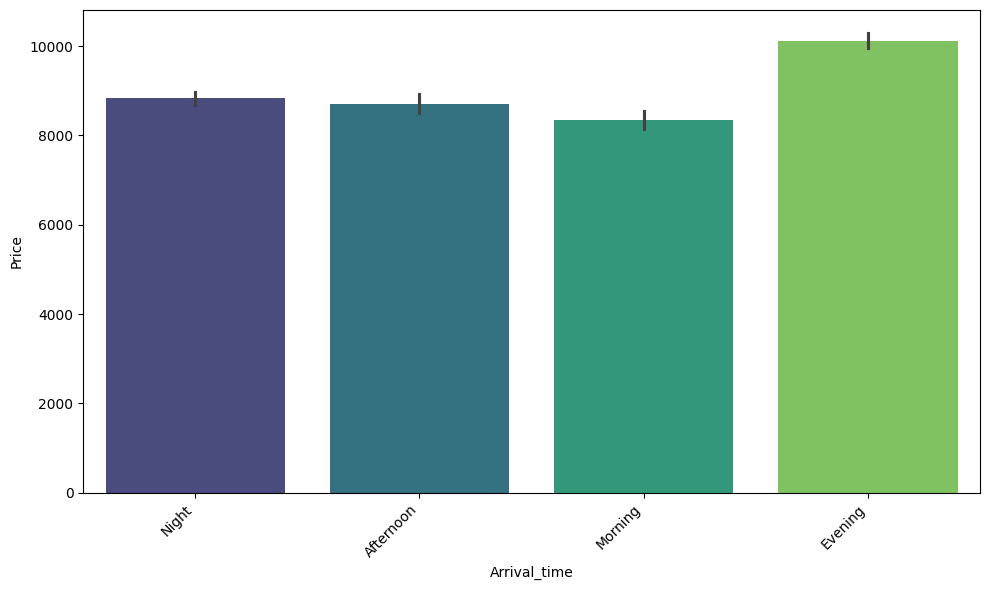

In [31]:
cat_col = df1[['Airline','Total_Stops','Dep_time','Arrival_time']]
for cat in cat_col:
    plt.figure(figsize=(10,6))
    sns.barplot(data=df1, x=cat, y='Price', palette='viridis')
    plt.xticks(rotation = 45, ha = 'right')
    plt.tight_layout()
    plt.show()

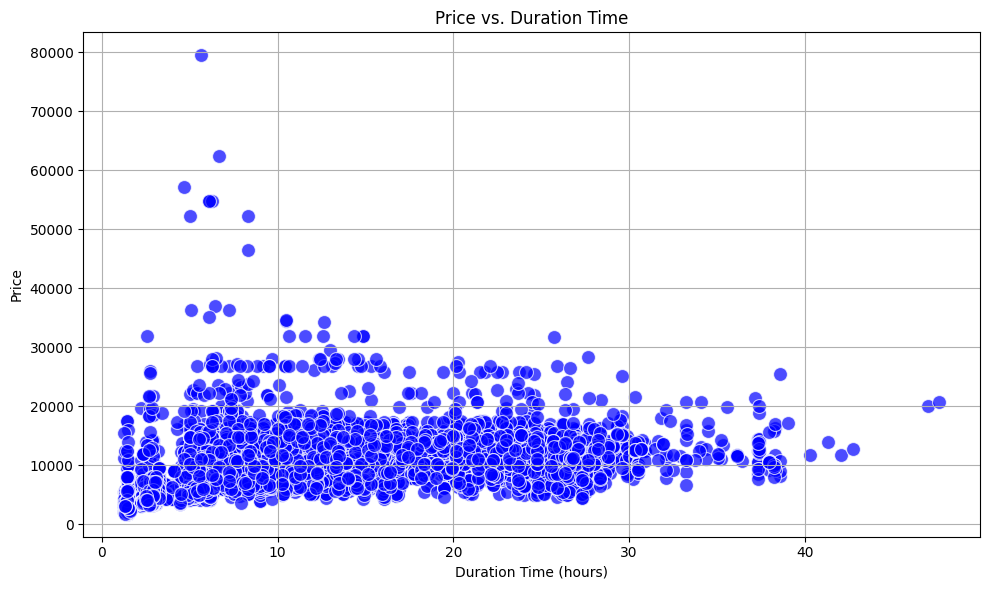

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df1, x='Duration_time', y='Price', color='b',s=100, alpha=0.7)
plt.xlabel('Duration Time (hours)')
plt.ylabel('Price')
plt.title('Price vs. Duration Time')
plt.grid(True)
plt.tight_layout()
plt.show()

## removing Outlier 

In [33]:
df1['Z_score'] = zscore(df1['Price'])
df1['Z_score']

0       -1.109321
1       -0.295204
2        1.049766
3       -0.607445
4        0.924350
           ...   
10678   -1.063913
10679   -1.055696
10680   -0.388833
10681    0.782934
10682    0.589405
Name: Z_score, Length: 10461, dtype: float64

In [34]:
outlier = df1[df1['Z_score'].abs() > 3]
outlier

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_time,Arrival_time,Duration_time,Z_score
123,Air India,Delhi,Cochin,1,27430,1,3,Night,Evening,20.250000,3.979291
396,Multiple carriers,Delhi,Cochin,1,36983,1,3,Afternoon,Evening,6.416667,6.044965
486,Jet Airways,Banglore,New Delhi,1,26890,1,3,Morning,Afternoon,6.333333,3.862525
510,Jet Airways,Banglore,New Delhi,1,26890,1,3,Morning,Afternoon,5.416667,3.862525
597,Air India,Mumbai,Hyderabad,2,25139,6,3,Morning,Afternoon,29.583333,3.483901
...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,Mumbai,Hyderabad,2,24210,6,3,Evening,Afternoon,21.000000,3.283020
10364,Jet Airways Business,Banglore,New Delhi,1,57209,1,3,Morning,Afternoon,4.666667,10.418495
10383,Jet Airways,Banglore,New Delhi,1,26890,1,3,Morning,Morning,22.083333,3.862525
10439,Jet Airways,Banglore,New Delhi,1,31825,1,3,Evening,Morning,14.333333,4.929635


In [35]:
df1 = df1[df1['Z_score'].abs() <= 3]
df1

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_time,Arrival_time,Duration_time,Z_score
0,IndiGo,Banglore,New Delhi,0,3897,24,3,Night,Night,2.833333,-1.109321
1,Air India,Kolkata,Banglore,2,7662,1,5,Morning,Afternoon,7.416667,-0.295204
2,Jet Airways,Delhi,Cochin,2,13882,9,6,Morning,Night,19.000000,1.049766
3,IndiGo,Kolkata,Banglore,1,6218,12,5,Evening,Night,5.416667,-0.607445
4,IndiGo,Banglore,New Delhi,1,13302,1,3,Afternoon,Night,4.750000,0.924350
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,Evening,Night,2.500000,-1.063913
10679,Air India,Kolkata,Banglore,0,4145,27,4,Evening,Night,2.583333,-1.055696
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,Morning,Morning,3.000000,-0.388833
10681,Vistara,Banglore,New Delhi,0,12648,1,3,Morning,Afternoon,2.666667,0.782934


In [36]:
df1 = df1.drop('Z_score', axis=1)

In [37]:
df1

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_time,Arrival_time,Duration_time
0,IndiGo,Banglore,New Delhi,0,3897,24,3,Night,Night,2.833333
1,Air India,Kolkata,Banglore,2,7662,1,5,Morning,Afternoon,7.416667
2,Jet Airways,Delhi,Cochin,2,13882,9,6,Morning,Night,19.000000
3,IndiGo,Kolkata,Banglore,1,6218,12,5,Evening,Night,5.416667
4,IndiGo,Banglore,New Delhi,1,13302,1,3,Afternoon,Night,4.750000
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,Evening,Night,2.500000
10679,Air India,Kolkata,Banglore,0,4145,27,4,Evening,Night,2.583333
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,Morning,Morning,3.000000
10681,Vistara,Banglore,New Delhi,0,12648,1,3,Morning,Afternoon,2.666667


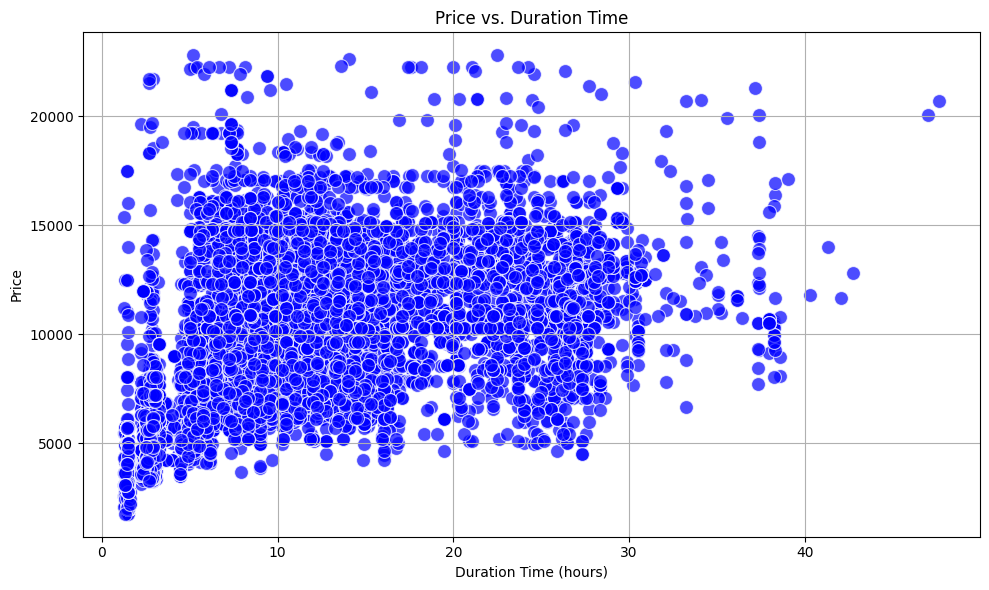

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df1, x='Duration_time', y='Price', color='b',s=100, alpha=0.7)
plt.xlabel('Duration Time (hours)')
plt.ylabel('Price')
plt.title('Price vs. Duration Time')
plt.grid(True)
plt.tight_layout()
plt.show()

## split the data

In [39]:
X = df1.drop('Price', axis=1)
y = df1['Price']

In [40]:
X

,Airline,Source,Destination,Total_Stops,Date,Month,Dep_time,Arrival_time,Duration_time
0,IndiGo,Banglore,New Delhi,0,24,3,Night,Night,2.833333
1,Air India,Kolkata,Banglore,2,1,5,Morning,Afternoon,7.416667
2,Jet Airways,Delhi,Cochin,2,9,6,Morning,Night,19.000000
3,IndiGo,Kolkata,Banglore,1,12,5,Evening,Night,5.416667
4,IndiGo,Banglore,New Delhi,1,1,3,Afternoon,Night,4.750000
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,9,4,Evening,Night,2.500000
10679,Air India,Kolkata,Banglore,0,27,4,Evening,Night,2.583333
10680,Jet Airways,Banglore,Delhi,0,27,4,Morning,Morning,3.000000
10681,Vistara,Banglore,New Delhi,0,1,3,Morning,Afternoon,2.666667


In [41]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10365, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8292, 9), (8292,), (2073, 9), (2073,))

## Equal Width Discretizing

In [44]:
'''ewq_disc = EqualWidthDiscretiser(bins=3, variables = ['Date','Month'])
ewq_disc.fit(X_train)'''

"ewq_disc = EqualWidthDiscretiser(bins=3, variables = ['Date','Month'])\newq_disc.fit(X_train)"

In [45]:
'''ewq_disc.binner_dict_'''

'ewq_disc.binner_dict_'

In [46]:
'''X_train = ewq_disc.transform(X_train)
X_test = ewq_disc.transform(X_test)'''

'X_train = ewq_disc.transform(X_train)\nX_test = ewq_disc.transform(X_test)'

In [47]:
'''t1 = X_train.groupby(['Date'])['Date'].count() / len(X_train)
t2 = X_test.groupby(['Date'])['Date'].count() / len(X_test)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['Train', 'Test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')'''

"t1 = X_train.groupby(['Date'])['Date'].count() / len(X_train)\nt2 = X_test.groupby(['Date'])['Date'].count() / len(X_test)\n\ntmp = pd.concat([t1, t2], axis=1)\ntmp.columns = ['Train', 'Test']\ntmp.plot.bar()\nplt.xticks(rotation=0)\nplt.ylabel('Number of observations per bin')"

In [48]:
'''t1 = X_train.groupby(['Month'])['Month'].count() / len(X_train)
t2 = X_test.groupby(['Month'])['Month'].count() / len(X_test)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['Train', 'Test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')'''

"t1 = X_train.groupby(['Month'])['Month'].count() / len(X_train)\nt2 = X_test.groupby(['Month'])['Month'].count() / len(X_test)\n\ntmp = pd.concat([t1, t2], axis=1)\ntmp.columns = ['Train', 'Test']\ntmp.plot.bar()\nplt.xticks(rotation=0)\nplt.ylabel('Number of observations per bin')"

In [49]:
'''X_train[['Date','Month']] = X_train[['Date','Month']].astype(object)
X_test[['Date','Month']] = X_test[['Date','Month']].astype(object)'''

"X_train[['Date','Month']] = X_train[['Date','Month']].astype(object)\nX_test[['Date','Month']] = X_test[['Date','Month']].astype(object)"

In [50]:
X_train

,Airline,Source,Destination,Total_Stops,Date,Month,Dep_time,Arrival_time,Duration_time
1969,Air India,Delhi,Cochin,2,6,6,Afternoon,Evening,7.250000
9155,Multiple carriers,Delhi,Cochin,1,3,6,Morning,Evening,11.500000
2110,Multiple carriers,Delhi,Cochin,1,21,3,Morning,Night,13.000000
1754,Air Asia,Kolkata,Banglore,2,9,6,Afternoon,Night,8.333333
1062,IndiGo,Delhi,Cochin,1,21,5,Morning,Night,11.750000
...,...,...,...,...,...,...,...,...,...
5852,Jet Airways,Kolkata,Banglore,1,24,3,Night,Night,7.583333
5291,Jet Airways,Delhi,Cochin,2,27,5,Morning,Evening,13.500000
5500,Jet Airways,Mumbai,Hyderabad,0,6,5,Morning,Morning,1.416667
870,Multiple carriers,Delhi,Cochin,1,21,3,Afternoon,Night,8.000000


## feature engineering

In [52]:
oe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
X_train = oe.fit_transform(X_train[['Airline','Source','Destination','Dep_time','Arrival_time']])
X_test = oe.transform(X_test[['Airline','Source','Destination','Dep_time','Arrival_time']])

In [53]:
X_train.shape

(8292, 25)

In [ ]:
'''X_train = pd.DataFrame(X_train, columns=oe.get_feature_names_out(['Airline', 'Source_destination', 'Dep_time', 'Arrival_time']))
X_test = pd.DataFrame(X_test, columns=oe.get_feature_names_out(['Airline', 'Source_destination', 'Dep_time', 'Arrival_time']))
X_train.columns'''

"X_train = pd.DataFrame(X_train, columns=oe.get_feature_names_out(['Airline', 'Source_destination', 'Dep_time', 'Arrival_time']))\nX_test = pd.DataFrame(X_test, columns=oe.get_feature_names_out(['Airline', 'Source_destination', 'Dep_time', 'Arrival_time']))\nX_train.columns"

In [ ]:
'''plt.figure(figsize=(10, 10))
plt.title('Before Scaling')
plt.xlabel('Values')
for col in X_train.columns:
    sns.kdeplot(X_train[col], label=col)
plt.legend()
plt.show()'''

"plt.figure(figsize=(10, 10))\nplt.title('Before Scaling')\nplt.xlabel('Values')\nfor col in X_train.columns:\n    sns.kdeplot(X_train[col], label=col)\nplt.legend()\nplt.show()"

## scalling

In [54]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [55]:
X_train

array([[ 2.24975632, -0.13573132, -0.49407593, ...,  1.71604617,
        -0.5291736 , -0.71460316],
       [-0.44449258, -0.13573132, -0.49407593, ...,  1.71604617,
        -0.5291736 , -0.71460316],
       [-0.44449258, -0.13573132, -0.49407593, ..., -0.5827349 ,
        -0.5291736 ,  1.39937808],
       ...,
       [-0.44449258, -0.13573132, -0.49407593, ..., -0.5827349 ,
         1.88973902, -0.71460316],
       [-0.44449258, -0.13573132, -0.49407593, ..., -0.5827349 ,
        -0.5291736 ,  1.39937808],
       [-0.44449258, -0.13573132, -0.49407593, ..., -0.5827349 ,
         1.88973902, -0.71460316]])

In [56]:
'''X_train = pd.DataFrame(X_train, columns=oe.get_feature_names_out(['Airline', 'Source_destination', 'Dep_time', 'Arrival_time']))
X_test = pd.DataFrame(X_test, columns=oe.get_feature_names_out(['Airline', 'Source_destination', 'Dep_time', 'Arrival_time']))
X_train.shape'''

"X_train = pd.DataFrame(X_train, columns=oe.get_feature_names_out(['Airline', 'Source_destination', 'Dep_time', 'Arrival_time']))\nX_test = pd.DataFrame(X_test, columns=oe.get_feature_names_out(['Airline', 'Source_destination', 'Dep_time', 'Arrival_time']))\nX_train.shape"

In [57]:
'''plt.figure(figsize=(10, 10))
plt.title('After Scaling')
plt.xlabel('Values')
for col in X_train.columns:
    sns.kdeplot(X_train[col], label=col)
plt.legend()
plt.show()'''

"plt.figure(figsize=(10, 10))\nplt.title('After Scaling')\nplt.xlabel('Values')\nfor col in X_train.columns:\n    sns.kdeplot(X_train[col], label=col)\nplt.legend()\nplt.show()"

## load and fit the model

In [58]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)

print(r2_score(y_test, y_pred1))
print(mean_absolute_error(y_test, y_pred1))
print(mean_squared_error(y_test, y_pred1))
print(np.sqrt(mean_squared_error(y_test, y_pred1)))
print(lr.score(X_test, y_test))

0.5366702968823753
2129.1507343672974
7721990.145537363
2778.8469093380018
0.5366702968823753


In [59]:
rf = RandomForestRegressor(
    n_estimators=200,  # Number of trees
    max_depth=20,      # Maximum depth of the tree
    min_samples_split=5,  # Minimum number of samples required to split an internal node
    min_samples_leaf=2,   # Minimum number of samples required to be at a leaf node
    random_state=42
)

rf.fit(X_train,y_train)
y_pred2 = rf.predict(X_test)

print(r2_score(y_test, y_pred2))
print(mean_absolute_error(y_test, y_pred2))
print(mean_squared_error(y_test, y_pred2))
print(np.sqrt(mean_squared_error(y_test, y_pred2)))

0.6161655419819589
1790.076733355734
6397098.831327313
2529.248669333902


In [60]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred3 = gbr.predict(X_test)

print(r2_score(y_test, y_pred3))
print(mean_absolute_error(y_test, y_pred3))
print(mean_squared_error(y_test, y_pred3))
print(np.sqrt(mean_squared_error(y_test, y_pred3)))

0.5846695781748799
1933.1842373141735
6922019.898347103
2630.973184649951


In [61]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred4 = xgb.predict(X_test)

print(r2_score(y_test, y_pred4))
print(mean_absolute_error(y_test, y_pred4))
print(mean_squared_error(y_test, y_pred4))
print(np.sqrt(mean_squared_error(y_test, y_pred4)))

0.6128327250480652
1792.6247908375542
6452644.179128034
2540.2055387562705


## test the result

In [62]:
X

,Airline,Source,Destination,Total_Stops,Date,Month,Dep_time,Arrival_time,Duration_time
0,IndiGo,Banglore,New Delhi,0,24,3,Night,Night,2.833333
1,Air India,Kolkata,Banglore,2,1,5,Morning,Afternoon,7.416667
2,Jet Airways,Delhi,Cochin,2,9,6,Morning,Night,19.000000
3,IndiGo,Kolkata,Banglore,1,12,5,Evening,Night,5.416667
4,IndiGo,Banglore,New Delhi,1,1,3,Afternoon,Night,4.750000
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,9,4,Evening,Night,2.500000
10679,Air India,Kolkata,Banglore,0,27,4,Evening,Night,2.583333
10680,Jet Airways,Banglore,Delhi,0,27,4,Morning,Morning,3.000000
10681,Vistara,Banglore,New Delhi,0,1,3,Morning,Afternoon,2.666667


In [63]:
X_d = oe.fit_transform(X[['Airline','Source','Destination','Dep_time','Arrival_time']])

categorical_columns = ['Airline','Source','Destination','Dep_time','Arrival_time']
numerical_columns = ['Total_Stops',	'Date',	'Month','Duration_time']
# Get the feature names
feature_names = oe.get_feature_names_out(categorical_columns)

# Convert the encoded array to a DataFrame with feature names
df_encoded = pd.DataFrame(X_d, columns=feature_names)

In [64]:
df_encoded.columns

Index(['Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Dep_time_Evening',
       'Dep_time_Morning', 'Dep_time_Night', 'Arrival_time_Evening',
       'Arrival_time_Morning', 'Arrival_time_Night'],
      dtype='object')

In [69]:
df_encoded.shape

(10365, 25)

In [65]:
rf.fit(X_d,y)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200, random_state=42)

In [66]:
# model saved in pickle format
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file)
    
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)  

In [67]:
df1.iloc[234]

Airline           Air Asia
Source             Kolkata
Destination       Banglore
Total_Stops              0
Price                 4409
Date                     1
Month                    5
Dep_time           Morning
Arrival_time     Afternoon
Duration_time     2.583333
Name: 235, dtype: object

In [68]:
value = X_d[234].reshape(-1,1).T
pred = loaded_model.predict(value)
pred

array([4507.62069777])